Project : Bank Churn Machine Learning Case Study

EXPOLATORY DATA ANALYSIS (EDA)


In [ ]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To get the dataset from CSV file
df=pd.read_csv("/content/drive/MyDrive/ML project /Bank_churn.csv")

In [ ]:
#To check the first 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#To check total no. of data (rows,columns) in the dataset
df.shape

(10000, 14)

In [ ]:
#Check the columns name present in data set
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#But here 'RowNumber', 'CustomerID' , 'Surname' are unwanted columns so delete them
# Remove three columns as index base
df.drop(df.columns[[0, 1, 2]], axis = 1, inplace = True)
#To show the starting first 5 data
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
#To check for Null values in dataset
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#To check the dublicates value in data set
df.duplicated().sum()


0

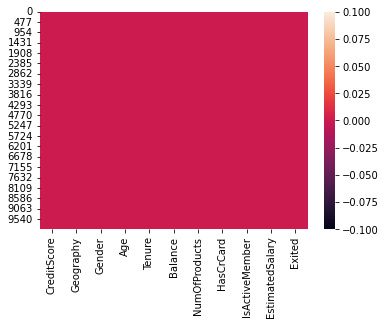

In [ ]:
#Visulaize null values
sns.heatmap(df.isnull())

In [ ]:
#check the data type 
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#Check Unique values in 'Gender' column
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#check number of Male and Female
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
#Check Unique values in 'Geography' column
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

NOTE: Here Object type data also not contain null values so we can say that
the given datadoesn't contain Null Values


In [ ]:
#Check number of class in 'Exited' (output) column
df['Exited'].unique()


array([1, 0])

In [ ]:
#Check for whether data is balanced or Imbalanced
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

# 0 -----------> Not Exited
# 1------------> Yes Exited

We will need to balanced the data before giving to Machine Learning Algorithm because it will
affect the accuracy of the model. After scaling we will balanced the data.


In [ ]:
#Convert the object type data into numeric because machine understand only binary number
#Seprate the data sent into two part  1. Numeric data 2. categorical data


In [ ]:
df_num=df.select_dtypes(('float64','int64')) #Numeric type data
df_cat=df.select_dtypes('object') #Object type data


In [ ]:
df_num.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df_cat.dtypes

Geography    object
Gender       object
dtype: object

In [ ]:
#Apply LableEncoder for converts object type data into numeric type
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
print(column)


Index(['Geography', 'Gender'], dtype='object')


In [ ]:
for col in column:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])
                               

  

In [ ]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [ ]:
#Return random 10 values from data set
df_cat.sample(10)

,Geography,Gender
6324,2,0
4921,2,0
5429,0,0
4896,0,1
7842,0,1
1557,1,1
2991,0,1
5803,2,1
2949,2,1
5599,1,0


In [ ]:
#To join both dataset df_num and df_cat and hold on new datafrome df_new
df_new=pd.concat([df_num,df_cat],axis=1)
#To show the starting first 5 data
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [ ]:
df_new.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Geography            int64
Gender               int64
dtype: object

#SELECT INPUT(X) AND OUTPUT(Y) , TRAIN TEST SPLITING

In [ ]:
X=df_new.drop("Exited",axis=1)#input
Y=df_new['Exited']#output

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


#SCALING (StandardScaler), CREATING def FUNCTION FOR
#ALGORITHMS

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()



In [ ]:
#scaling
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
#Create user defined function
def create_model(model): #Here model passing argument(object)
    model.fit(X_train,Y_train) #Train the model with 70% data
    Y_pred=model.predict(X_test) #Test the model with 30% data
    print(classification_report(Y_test,Y_pred)) #To generate Classification report
    print(confusion_matrix(Y_test,Y_pred)) #To generate Confusion matrix
    return model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#Previously we have find that the data is imbalanced so we will need to balanced it before
#For Balancing the data we need to apply Sampling Technnique
#We will apply RandomOverSampler which is a type of Sampling Technique
#RandomOverSampler : inbuilt class : to increase means create duplicate records of minorit
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler()

In [ ]:
X_train,Y_train=ros.fit_resample(X_train,Y_train)
#here make a duplicate record from existing record of minority class


In [ ]:

X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [ ]:
Y_test.value_counts()

0    2373
1    2373
Name: Exited, dtype: int64

In [ ]:
#Here data is balanced now so we can give our data to Machine Learning Algorithms


#LOGISTIC REGRESSION

In [ ]:
#Create a baseline model : logistic Regression
from sklearn.linear_model import LogisticRegression
#Create object of class LogisticRegression
lr=LogisticRegression()


In [ ]:
#call funtion
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      2373
           1       0.70      0.65      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1723  650]
 [ 832 1541]]


NOTE: Here LogisticRegression Algorithm gives about 0.69 Accuracy score. But here in this case
we have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1
is 0.66.
Lets, test the data with other models(Algorithms).


#DECISION TREE CLASSIFIER

In [ ]:
#Now perform dataset with the help of DecisionTreeClassifier
#Call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

#call function train and test the model





In [ ]:
#Create a object of class DecisionTreeClassifier
dt=DecisionTreeClassifier()


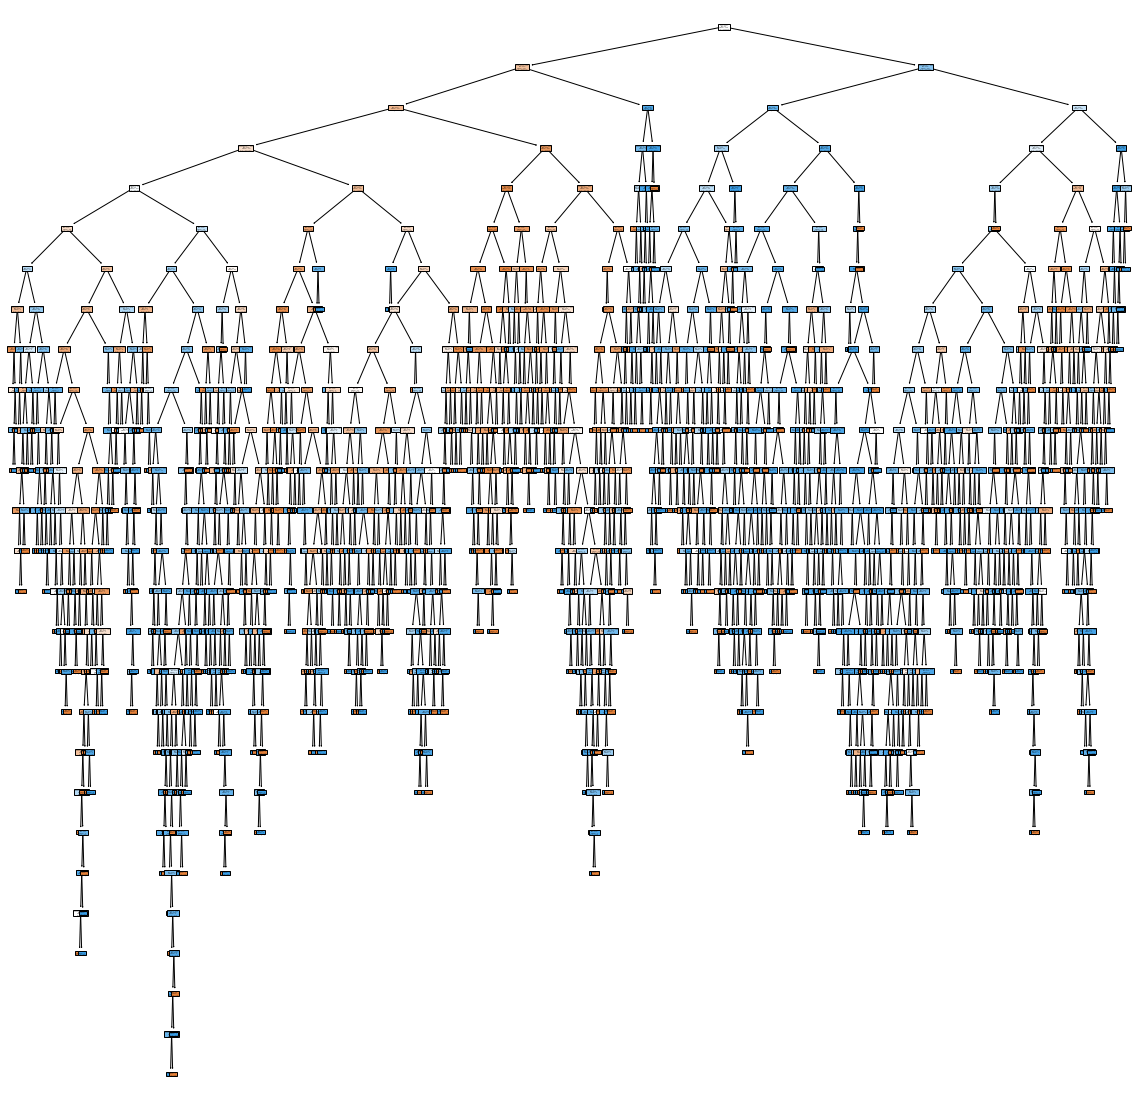

In [ ]:
from sklearn import tree
#create a tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [ ]:
#show the information gain of all input features, use inbuilt method
#feature_importances_ of DecisionTreeClassifier
dict={'Input columns':X.columns,'Information Gain':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('Information Gain',ascending=False)

,Input columns,Information Gain
1,Age,0.241119
3,Balance,0.163815
7,EstimatedSalary,0.158584
4,NumOfProducts,0.129132
0,CreditScore,0.122589
2,Tenure,0.070618
6,IsActiveMember,0.041173
8,Geography,0.036251
9,Gender,0.021403
5,HasCrCard,0.015315


In [ ]:
#call function
dt=create_model(dt)


              precision    recall  f1-score   support

           0       0.62      0.88      0.73      2373
           1       0.79      0.46      0.58      2373

    accuracy                           0.67      4746
   macro avg       0.71      0.67      0.65      4746
weighted avg       0.71      0.67      0.65      4746

[[2088  285]
 [1289 1084]]


In [ ]:
#Here clearly understood that the model is overfit ,so reduced the overfitting situation 
#By using the Pruning technique There are 2 types of
#1. max_depth : inbulit parameter
#2. min_samples_leaf : inbuilt parameter


In [ ]:
#1.max_depth parameter
#Create object of DecisionTreeClassifier class and pass the parameter
#max_depth
dt1=DecisionTreeClassifier(max_depth=8,random_state=1)
#by default use inbuilt method gini index


In [ ]:
#Call function
dt1=create_model(dt1)


              precision    recall  f1-score   support

           0       0.72      0.82      0.77      2373
           1       0.79      0.69      0.73      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.75      4746
weighted avg       0.76      0.75      0.75      4746

[[1941  432]
 [ 746 1627]]


In [ ]:
#Use second pruning tech .
#min_samples_leaf : Atleast 45-50 or more

In [ ]:
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method
#min_samples_leaf =50 or more means not less than=45-50


In [ ]:
#Call function
dt2=create_model(dt2)


              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2373
           1       0.80      0.68      0.73      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.75      4746
weighted avg       0.76      0.75      0.75      4746

[[1960  413]
 [ 768 1605]]


NOTE: Here DecisionTreeClassifier Algorithm without Pruning technique gives about 0.67
Accuracy score. But here in this case we have to focus on recall score, here recall score of Class
0 is 0.88 and recall score of Class 1 is 0.46.
Here DecisionTreeClassifier Algorithm with Pruning technique (max_depth parameter) gives
about 0.75 Accuracy score. But here in this case we have to focus on recall score, here recall
score of Class 0 is 0.82 and recall score of Class 1 is 0.69.
Here DecisionTreeClassifier Algorithm with Pruning technique with (min_samples_leaf) gives
about 0.75 Accuracy score. But here in this case we have to focus on recall score, here recall
score of Class 0 is 0.83 and recall score of Class 1 is 0.68.
Lets, test the data with other models(Algorithms).


#RANDOM FOREST CLASSIFIER


In [ ]:
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier
#ensemble means to train the same dataset from multiple alorithm

In [ ]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10)
#n_estimators inbuilt parameter : no. of decision tree
#max n_estimators can be given<=100
#bydefault method gini index


In [ ]:
#Call function
rfc=create_model(rfc)


              precision    recall  f1-score   support

           0       0.65      0.92      0.76      2373
           1       0.86      0.50      0.63      2373

    accuracy                           0.71      4746
   macro avg       0.76      0.71      0.70      4746
weighted avg       0.76      0.71      0.70      4746

[[2183  190]
 [1184 1189]]


NOTE: Here RandomForestClassifier Algorithm gives about 0.71 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.92 and recall score of
Class 1 is 0.50.
Lets, test the data with other models(Algorithms).

#BOOSTING TECHNIQUE


Ensembling technique:
1. Random forest tree
2. Boosting technique:-
A. ADA Boost : Adaptor Boosting
B. Gradient Boost
C. Extreme Gradient Boost



In [ ]:
#Boosting Trechnique
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=9,random_state=1)
#n_estimators means no. of decision tree (depend on no. of input features)

In [ ]:
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2373
           1       0.78      0.74      0.76      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.76      4746
weighted avg       0.77      0.76      0.76      4746

[[1871  502]
 [ 615 1758]]


In [ ]:
#Call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=25,random_state=1)
#not can be <= 100 #n_estimators means no. of decision tree (depend on no. of input features)

In [ ]:
#call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      2373
           1       0.79      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.76      4746
weighted avg       0.77      0.76      0.76      4746

[[1912  461]
 [ 655 1718]]


In [ ]:
##Call Extreme Gradient Boosting (XGB) class from following package
from xgboost import XGBClassifier


In [ ]:
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=25,reg_alpha=1)
#reg means regularation : lambda or alpha
#automatic overfitting : reg means regularation and alpha or lambda :
#hyperparameter
#1 means True

In [ ]:
#call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      2373
           1       0.79      0.73      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1909  464]
 [ 634 1739]]


NOTE: Here ADA Boost Classifier Algorithm gives about 0.76 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.79 and recall score of
Class 1 is 0.74.
Here Gradient Boost Classifier Algorithm gives about 0.76 Accuracy score. But here in this case
we have to focus on recall score, here recall score of Class 0 is 0.81 and recall score of Class 1
is 0.72.
Here Extreme Gradient Classifier Algorithm gives about 0.77 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.80 and recall score of
Class 1 is 0.73.
Lets, test the data with other models(Algorithms).


#K-nn (KNeighborsClassifier) Algorithm


In [ ]:
#Use K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Create the object of KNeighborsClassifier
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)


In [ ]:
#call function
knc=create_model(knc)


              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2373
           1       0.73      0.66      0.69      2373

    accuracy                           0.71      4746
   macro avg       0.71      0.71      0.71      4746
weighted avg       0.71      0.71      0.71      4746

[[1794  579]
 [ 804 1569]]


NOTE: Here KNeighborsClassifier Algorithm gives about 0.71 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.76 and recall score of
Class 1 is 0.66.
Lets, test the data with other models(Algorithms).


#Support Vector Machine Algorithm

In [ ]:
#Apply Support vector machine
from sklearn.svm import LinearSVC

In [ ]:
#Create object of LinearSVC class
svc=LinearSVC(random_state=1) #Hard margin by default means to outlier 

In [ ]:
#call function
svc=create_model(svc)


              precision    recall  f1-score   support

           0       0.67      0.73      0.70      2373
           1       0.70      0.65      0.67      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1721  652]
 [ 838 1535]]


In [ ]:
#Here accuracy is 0.71 which is good but we can more better means can be possible ,model i
#because there can be no error on training time but error on testing time ,
#what do we do , add some external error on training time if create a object of LinearSVC
#Soft margin means to reduced overfitting situation means some error add on
#training time
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.10)#soft margin
#always C means error parameter means to add external error on training time
#with the help of C parameter
#the value of C should be less than 1

In [ ]:
#Call function
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       0.67      0.73      0.70      2373
           1       0.70      0.65      0.67      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1721  652]
 [ 838 1535]]


In [ ]:
#Here data is non-linear so by changing the value of "C" above the accuracy not changes

In [ ]:
#if adding external error on training time but no any changes on score
#means given dataset in non-Linear can be possible , dataset is not linear means dataset i
#use Non-linear kernal function of SVM means 2 classes are not separatable with straight l
#There are 3 types of Kernal function of SVM
#1. Linear SVC : use for linear data
#2. Non-Linear SVC : use for non-linear data
#A. polynomial kernal function : increase the low dimension to high dimension
#B. radial basis kernal function


In [ ]:
#Kernel function : Converts low dimension data to high dimension data
#if we have 1 D array then converts 2D array and we have 2D array then to converts 3D arra
#polynomial Kernel function
#radial basis Kernel function
#both are used for non-linear data

In [ ]:
#Give data to Polynomial kernel function , call inbuilt class SVC
from sklearn.svm import SVC
#SVC means support vector classifier

In [ ]:
#create object of SVC class
svc=SVC(random_state=1,kernel='poly')

In [ ]:
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       0.67      0.73      0.70      2373
           1       0.70      0.65      0.67      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1721  652]
 [ 838 1535]]


In [ ]:
#Give dataset to radial basis means kernel=rbf
svc2=SVC(random_state=1,kernel='rbf')

In [ ]:
#call function
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1893  480]
 [ 658 1715]]


NOTE: Here SupportVectorMachine Algorithm with hard margin gives about 0.69 Accuracy
score. But here in this case we have to focus on recall score, here recall score of Class 0 is 0.73
and recall score of Class 1 is 0.65.
Here SupportVectorMachine Algorithm with soft margin gives about 0.69 Accuracy score. But
here in this case we have to focus on recall score, here recall score of Class 0 is 0.73 and recall
score of Class 1 is 0.65.
Here SupportVectorMachine Algorithm with Polynomial kernel function gives about 0.69
Accuracy score. But here in this case we have to focus on recall score, here recall score of Class
0 is 0.73 and recall score of Class 1 is 0.65.
Here SupportVectorMachine Algorithm with Radial basis Kernel function gives about 0.76
Accuracy score. But here in this case we have to focus on recall score, here recall score of Class
0 is 0.80 and recall score of Class 1 is 0.72.
Lets, test the data with other models(Algorithms).

#Naive Bayes Classifier Algorithm

In [ ]:
#Apply Navie Bayes Theorem (Classification theorem)
#1. Gaussian Naive Bayes theorem
from sklearn.naive_bayes import GaussianNB
#Inbuilt class GaussianNB


In [ ]:
#create the object of class GaussianNB
#GaussianNB algorithm are applied on continuous Numerical value of input column
gnb=GaussianNB()


In [ ]:
#call function
gnb=create_model(gnb)


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2373
           1       0.75      0.68      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1847  526]
 [ 758 1615]]


NOTE: Here Gaussian Naive Bayes Algorithm gives about 0.73 Accuracy score. But here in this
case we have to focus on recall score, here recall score of Class 0 is 0.78 and recall score of
Class 1 is 0.68.
Lets, test the data with other models(Algorithms).


#CONCLUSION : Hence, we will recommend ExtremeGradient Classifier Algorithm for the given Dataset of BankChurn.

Gradient Boost Classifier Algorithm gives about 0.77 Accuracy score. 
we have to focus on recall score, here recall score of Class 0 is 0.8 and recall score of Class 1
is 0.70.